In [1]:
#overfitting
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth = None)
model.fit(X_train,y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [2]:
print("training score :",model.score(X_train,y_train))
print("test score :",model.score(X_test,y_test))#overfit

training score : 1.0
test score : 0.9298245614035088


In [3]:
model = DecisionTreeClassifier(
    max_depth=3  # limit complexity
)

model.fit(X_train, y_train)

print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))#normal

Train Score: 0.978021978021978
Test Score: 0.9473684210526315


In [4]:

model = DecisionTreeClassifier(
    max_depth=1  
)

model.fit(X_train, y_train)

print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))#underfit




Train Score: 0.9208791208791208
Test Score: 0.8947368421052632


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create model
model = DecisionTreeClassifier(random_state=42)

# Define parameters to test
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid = GridSearchCV(
    model,
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best CV Score: 0.9384615384615385


In [6]:
best_model = grid.best_estimator_

print("Train Score:", best_model.score(X_train, y_train))
print("Test Score:", best_model.score(X_test, y_test))

Train Score: 0.9934065934065934
Test Score: 0.9385964912280702


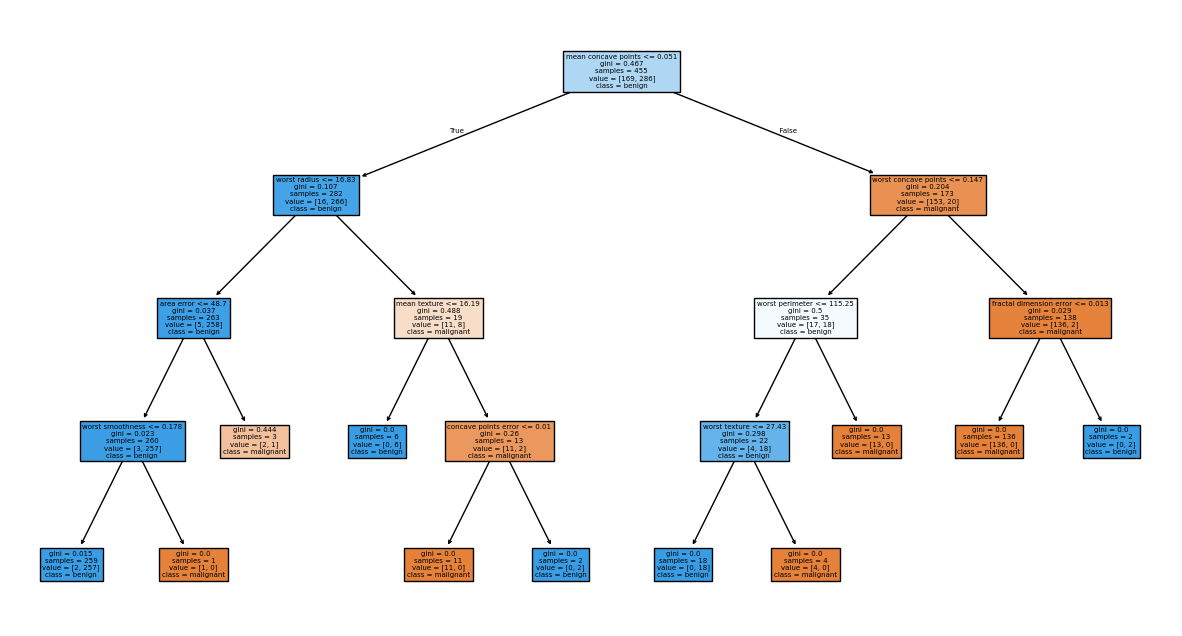

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(
    best_model,
    filled=True,
    feature_names=data.feature_names,
    class_names=data.target_names
)
plt.show()

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.956140350877193
